# Project Title: Account-Level Bot Detection on Social Media Using Behavioral Machine Learning

Problem Statement

Social media platforms suffer from automated accounts that artificially inflate engagement (likes).
This project builds a machine-learning system that estimates the likelihood that a single account exhibits bot-like behavior, based on activity patterns.

⚠️ Important:
The system outputs a probability score, not a definitive label.

In [2]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)
n = 1500

In [4]:
def generate_accounts(is_bot):
    if is_bot:
        return pd.DataFrame({
            "account_age_days": np.random.normal(50, 25, n),
            "likes_per_day": np.random.normal(70, 15, n),
            "median_time_between_likes": np.random.normal(25, 10, n),
            "night_activity_ratio": np.random.uniform(0.8, 1.0, n),
            "content_diversity_score": np.random.uniform(0.9, 1.0, n),
            "burstiness_index": np.random.uniform(0.7, 1.0, n),
            "engagement_entropy": np.random.uniform(0.1, 0.3, n),
            "is_bot": 1
        })
    else:
        return pd.DataFrame({
            "account_age_days": np.random.normal(1200, 400, n),
            "likes_per_day": np.random.normal(10, 4, n),
            "median_time_between_likes": np.random.normal(600, 200, n),
            "night_activity_ratio": np.random.uniform(0.1, 0.4, n),
            "content_diversity_score": np.random.uniform(0.4, 0.8, n),
            "burstiness_index": np.random.uniform(0.1, 0.4, n),
            "engagement_entropy": np.random.uniform(0.6, 0.9, n),
            "is_bot": 0
        })

df = pd.concat([generate_accounts(0), generate_accounts(1)])
df = df.clip(lower=0)

print(df.head())

   account_age_days  likes_per_day  median_time_between_likes  \
0       1398.685661      13.113444                 218.438488   
1       1144.694280       7.795257                 427.922998   
2       1459.075415       6.727204                 517.278893   
3       1809.211943       9.986502                 977.537531   
4       1106.338650       9.319262                 711.310625   

   night_activity_ratio  content_diversity_score  burstiness_index  \
0              0.395227                 0.772978          0.241352   
1              0.187675                 0.778923          0.272020   
2              0.188445                 0.547607          0.378370   
3              0.206364                 0.454207          0.348513   
4              0.269378                 0.607360          0.196894   

   engagement_entropy  is_bot  
0            0.660438       0  
1            0.670258       0  
2            0.756380       0  
3            0.651630       0  
4            0.691630       

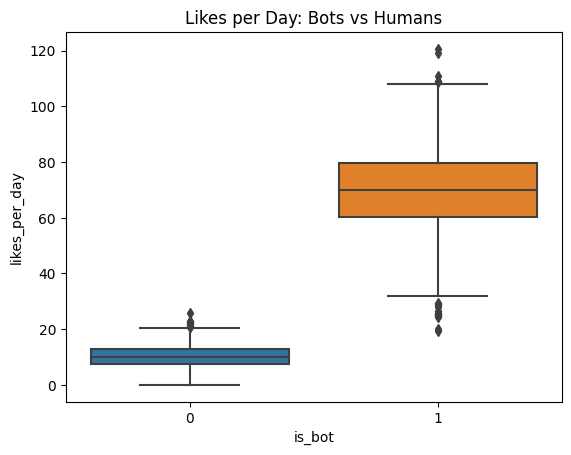

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="is_bot", y="likes_per_day", data=df)
plt.title("Likes per Day: Bots vs Humans")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [7]:
X = df.drop("is_bot", axis=1)
y = df["is_bot"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       287

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [10]:
import pandas as pd

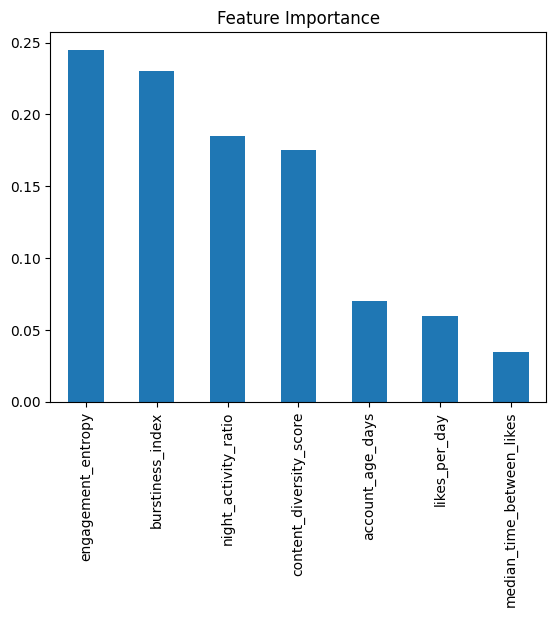

In [11]:
importances = pd.Series(
    model.feature_importances_, index=X.columns
).sort_values(ascending=False)

importances.plot(kind="bar", title="Feature Importance")
plt.show()


In [12]:
sample_account = pd.DataFrame([{
    "account_age_days": 40,
    "likes_per_day": 85,
    "median_time_between_likes": 20,
    "night_activity_ratio": 0.92,
    "content_diversity_score": 0.97,
    "burstiness_index": 0.88,
    "engagement_entropy": 0.18
}])

In [13]:
prob = model.predict_proba(sample_account)[0][1]
print(f"Bot Likelihood Score: {prob:.2f}")


Bot Likelihood Score: 1.00
